In [1]:
import pandas as pd

import sys
sys.path.insert(0, '..')

from gsea.compute_enrichment_score import compute_enrichment_score
from gsea.run_single_sample_gsea import run_single_sample_gsea
from gsea.run_gsea import run_gsea

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
gene_x_sample = pd.read_table(
    'gene_x_kras_isogenic_and_imortalized_cell_line.tsv', index_col=0)

gene_x_sample

,SLG1_1,SLG2_1,SLGP1_1,SLGP2_1,SLK1PU_1,SLK1_1,SLK2PU_1,SLK2_1,SLKP1_1,SLKP2_1
Name,,,,,,,,,,
7SK,0.095021,0.317834,0.166109,0.000000,0.188393,0.291156,0.103048,0.385592,0.139740,0.000000
A1BG,0.034328,0.019137,0.040007,0.081093,0.170151,0.026296,0.093070,0.116085,0.016828,0.099104
A1CF,0.000000,0.015482,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013613,0.008017
A2LD1,1.019684,0.785201,1.957793,1.646291,1.418078,2.135402,1.519507,1.309818,0.747987,1.279170
A2M,0.193676,0.418990,0.256033,0.344846,10.144233,0.419251,0.238250,0.435324,0.325918,0.340488
A2ML1,0.863153,1.158374,0.102432,0.055900,0.017873,0.004604,0.007332,0.008129,0.006629,0.002602
A2ML1-AS1,0.938860,0.672937,0.859698,0.475254,1.063671,0.787689,0.909078,0.544265,0.460236,0.464648
A2MP1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007059,0.008804,0.000000,0.000000
A3GALT2P,0.000000,0.000000,0.000000,0.017346,0.072792,0.000000,0.063706,0.000000,0.014398,0.033918


In [3]:
gene_sets = []

with open('c2.all.v5.1.symbols.5.gmt') as file_:

    for line in file_:
        line = line.strip().split('\t')

        gene_sets.append(line[:1] +
                         [gene for gene in line[2:] if gene != 'None'])

gene_sets = pd.DataFrame(gene_sets).set_index(0)

gene_sets

,1,2,3,4,5,6,7,8,9,10,...,37,38,39,40,41,42,43,44,45,46
0,,,,,,,,,,,,,,,,,,,,,
ABBUD_LIF_SIGNALING_1_DN,AHNAK,ALCAM,ANKRD40,BCKDHB,C16orf89,CAPN9,CD24,CYFIP1,DCAF11,DDC,...,None,None,None,None,None,None,None,None,None,None
ABBUD_LIF_SIGNALING_1_UP,ACAA2,AHSG,ALDOC,ANXA8L2,BCL3,CEBPB,CXCL14,CYB561,ELF3,FBP1,...,ST3GAL1,STAT3,TAPBP,TMEM176A,TMEM176B,TNFRSF1A,TSPAN4,UPP1,VWF,XBP1
ABBUD_LIF_SIGNALING_2_DN,CGA,CITED2,NALCN,PITX2,PTHLH,SCN1A,ZNF280D,None,None,None,...,None,None,None,None,None,None,None,None,None,None
ABBUD_LIF_SIGNALING_2_UP,ANGPT1,ATP1B1,C2CD4B,COL11A1,DCN,DIO2,EZR,FGFR1,GPX2,JUNB,...,None,None,None,None,None,None,None,None,None,None
ABDELMOHSEN_ELAVL4_TARGETS,BCL2,CAB39,CASP3,CDC42,CDH2,DLG4,EIF2AK2,ITGA1,ITGB1,KCNQ2,...,None,None,None,None,None,None,None,None,None,None


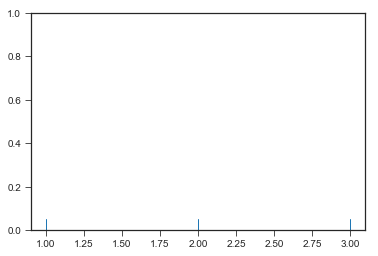

In [15]:
import seaborn as sns
sns.rugplot(range(3))

/Users/k/Jumis/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:395: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  mask |= (ar1 == a)


array(0.5513670516099552)

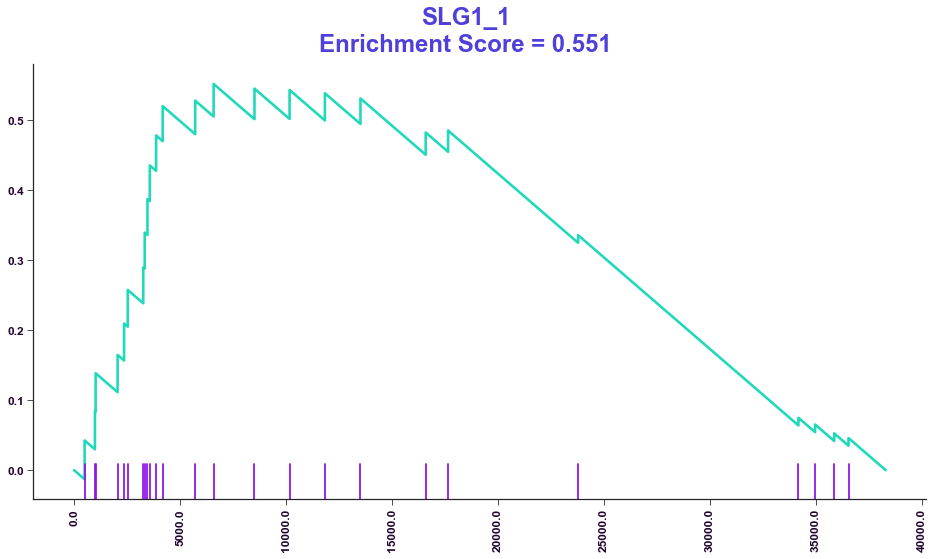

In [31]:
compute_enrichment_score(
    gene_x_sample.iloc[:, 0],
    gene_sets.iloc[0],
    normalization_method='rank',
    power=1,
    statistic='ks',
    plot=True,
    plot_file_path='mountain_plot.png')

In [5]:
gene_set_x_sample = run_single_sample_gsea(
    gene_x_sample,
    gene_sets,
    normalization_method='rank',
    power=1,
    statistic='ks',
    file_path='gene_set_x_sample.tsv')

gene_set_x_sample


(1/10) Computing gene set enrichment in SLG1_1 ...
	(1/5) Computing the enrichment of ABBUD_LIF_SIGNALING_1_DN ...
0.5513670516099552
<class 'numpy.ndarray'>
	(2/5) Computing the enrichment of ABBUD_LIF_SIGNALING_1_UP ...
0.4885660011230732
<class 'numpy.ndarray'>
	(3/5) Computing the enrichment of ABBUD_LIF_SIGNALING_2_DN ...
0.4756697679547671
<class 'numpy.ndarray'>
	(4/5) Computing the enrichment of ABBUD_LIF_SIGNALING_2_UP ...
0.43657309027885927
<class 'numpy.ndarray'>
	(5/5) Computing the enrichment of ABDELMOHSEN_ELAVL4_TARGETS ...
0.6436744321176842
<class 'numpy.ndarray'>

(2/10) Computing gene set enrichment in SLG2_1 ...
	(1/5) Computing the enrichment of ABBUD_LIF_SIGNALING_1_DN ...
0.5445223567486503
<class 'numpy.ndarray'>
	(2/5) Computing the enrichment of ABBUD_LIF_SIGNALING_1_UP ...
0.4928520888200907
<class 'numpy.ndarray'>
	(3/5) Computing the enrichment of ABBUD_LIF_SIGNALING_2_DN ...
0.48313458106779505
<class 'numpy.ndarray'>
	(4/5) Computing the enrichment of A

,SLG1_1,SLG2_1,SLGP1_1,SLGP2_1,SLK1PU_1,SLK1_1,SLK2PU_1,SLK2_1,SLKP1_1,SLKP2_1
Gene Set,,,,,,,,,,
ABBUD_LIF_SIGNALING_1_DN,0.551367,0.544522,0.557671,0.560709,0.526087,0.549746,0.521670,0.554290,0.572263,0.564951
ABBUD_LIF_SIGNALING_1_UP,0.488566,0.492852,0.480265,0.473836,0.516807,0.493098,0.505336,0.531051,0.524920,0.478589
ABBUD_LIF_SIGNALING_2_DN,0.475670,0.483135,0.488987,0.484645,0.479305,0.434709,0.487364,0.440452,0.421686,0.442778
ABBUD_LIF_SIGNALING_2_UP,0.436573,0.448567,0.395256,0.402048,0.489260,0.427987,0.490309,0.416740,0.454343,0.460547
ABDELMOHSEN_ELAVL4_TARGETS,0.643674,0.656607,0.654617,0.656606,0.659093,0.635120,0.668931,0.645394,0.640069,0.633542
